In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from bem import steady_bem

In [2]:
# Inputs
R = 89.17       # Radius of rotor [m]
V_0 = 10.0      # Widx speed [m/s]
omega = 8.032   # Angular velocity of rotor [RPM]
# Read txt with blade data

# df = pd.read_csv('data/bladedat.txt', sep='\t')
df = pd.read_csv('data/bladedat.txt', sep='\t', names=['r', 'beta', 'c', 'thick'])
r = df['r']


Data output of Ashes 

In [3]:
V_list = np.array([5, 9, 11, 20])
omega_max_list= np.array([4.25618, 7.66112, 9.36359, 9.72622])*2*np.pi/60  #rad/second
theta_list = np.array([0.051282051, 0.051282051, 0.051282051, 17.114])  #degrees
lamda_list = omega_max_list*R/(V_list) #dimensionless

In [4]:
data_txt = ['ashes/Speed_5/v5_blade.txt','ashes/Speed_9/v9_blade.txt','ashes/Speed_11/v11_blade.txt','ashes/Speed_20/v20_blade.txt']
# data_txt = ['Ashes/Speed_9/v9_blade_sev.txt']

# df_Ashes = pd.read_csv('Ashes/Speed_5/v5_blade.txt',sep='\t',names=['r', 'Pt','Pn'])
# r_Ashes = df_Ashes['r']
# Pt_Ashes = df_Ashes['Pt']
# Pn_Ashes = df_Ashes['Pn']



In [5]:
# ashes = np.loadtxt('Ashes/Speed_5/v5_blade.txt')
title = [5, 9, 11, 20]
# Torque = [0, -42.8342, -88.6598, 136.274, 105.775, 75.2788, 57.8052 ,22.3981 ,216.683 ,611.082 ,608.58 ,621.466, 619.759 ,618.293 ,627.953, 626.922 ,626.621, 626.319 ,625.779 ,624.932, 623.795 ,622.385 ,620.81 ,618.89, 616.074 ,612.45 ,607.743, 601.62 ,593.704 ,583.657 ,571.018 ,555.369, 536.179, 512.835, 484.625 ,450.682 ,409.634, 359.326 ,295.602 ,207.146, 0]


In [46]:
def alignYaxes(axes, align_values=None):
    '''Align the ticks of multiple y axes
    Args:
        axes (list): list of axes objects whose yaxis ticks are to be aligned.
    Keyword Args:
        align_values (None or list/tuple): if not None, should be a list/tuple
            of floats with same length as <axes>. Values in <align_values>
            define where the corresponding axes should be aligned up. E.g.
            [0, 100, -22.5] means the 0 in axes[0], 100 in axes[1] and -22.5
            in axes[2] would be aligned up. If None, align (approximately)
            the lowest ticks in all axes.
    Returns:
        new_ticks (list): a list of new ticks for each axis in <axes>.
        A new sets of ticks are computed for each axis in <axes> but with equal
        length.
    '''
    from matplotlib.pyplot import MaxNLocator
    nax=len(axes)
    ticks=[aii.get_yticks() for aii in axes]
    if align_values is None:
        aligns=[ticks[ii][0] for ii in range(nax)]
    else:
        if len(align_values) != nax:
            raise Exception("Length of <axes> doesn't equal that of <align_values>.")
        aligns=align_values
    bounds=[aii.get_ylim() for aii in axes]
    # align at some points
    ticks_align=[ticks[ii]-aligns[ii] for ii in range(nax)]
    # scale the range to 1-100
    ranges=[tii[-1]-tii[0] for tii in ticks]
    lgs=[-np.log10(rii)+2. for rii in ranges]
    igs=[np.floor(ii) for ii in lgs]
    log_ticks=[ticks_align[ii]*(10.**igs[ii]) for ii in range(nax)]
    # put all axes ticks into a single array, then compute new ticks for all
    comb_ticks=np.concatenate(log_ticks)
    comb_ticks.sort()
    locator=MaxNLocator(nbins='auto', steps=[1, 2, 2.5, 3, 4, 5, 8, 10])
    new_ticks=locator.tick_values(comb_ticks[0], comb_ticks[-1])
    new_ticks=[new_ticks/10.**igs[ii] for ii in range(nax)]
    new_ticks=[new_ticks[ii]+aligns[ii] for ii in range(nax)]
    # find the lower bound
    idx_l=0
    for i in range(len(new_ticks[0])):
        if any([new_ticks[jj][i] > bounds[jj][0] for jj in range(nax)]):
            idx_l=i-1
            break
    # find the upper bound
    idx_r=0
    for i in range(len(new_ticks[0])):
        if all([new_ticks[jj][i] > bounds[jj][1] for jj in range(nax)]):
            idx_r=i
            break
    # trim tick lists by bounds
    new_ticks=[tii[idx_l:idx_r+1] for tii in new_ticks]
    # set ticks for each axis
    for axii, tii in zip(axes, new_ticks):
        axii.set_yticks(tii)
    return new_ticks

[ 0.       2.64302  5.37977  8.20274 11.1031  14.071   17.0953  20.1641
 23.2647  26.3837  29.5076  32.6228  35.7156  38.773   41.7824  44.732
 47.6111  50.4099  53.1201  55.7344  58.247   60.6534  62.9501  65.1352
 67.2076  69.1675  71.0159  72.7545  74.386   75.9133  77.3402  78.6705
 79.9085  81.0585  82.1252  83.113   84.0265  84.8703  85.6487  86.366  ]
0      2.800000
1     11.002738
2     16.871021
3     22.964122
4     32.307638
5     41.573020
6     50.411062
7     58.534435
8     65.750095
9     71.967492
10    77.185974
11    78.713347
12    80.140217
13    82.708485
14    84.925156
15    86.826486
16    88.448663
17    89.166000
Name: r, dtype: float64


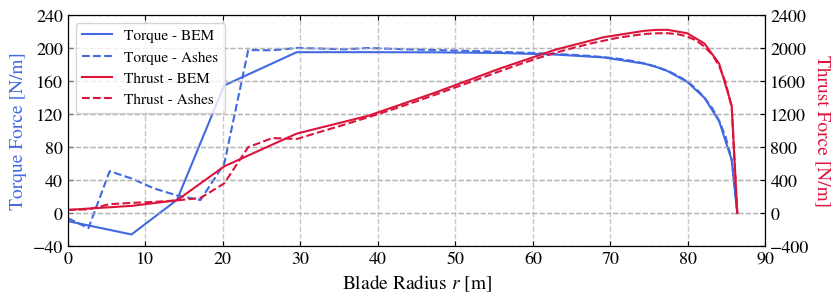

[ 0.       2.64302  5.37977  8.20274 11.1031  14.071   17.0953  20.1641
 23.2647  26.3837  29.5076  32.6228  35.7156  38.773   41.7824  44.732
 47.6111  50.4099  53.1201  55.7344  58.247   60.6534  62.9501  65.1352
 67.2076  69.1675  71.0159  72.7545  74.386   75.9133  77.3402  78.6705
 79.9085  81.0585  82.1252  83.113   84.0265  84.8703  85.6487  86.366  ]
0      2.800000
1     11.002738
2     16.871021
3     22.964122
4     32.307638
5     41.573020
6     50.411062
7     58.534435
8     65.750095
9     71.967492
10    77.185974
11    78.713347
12    80.140217
13    82.708485
14    84.925156
15    86.826486
16    88.448663
17    89.166000
Name: r, dtype: float64


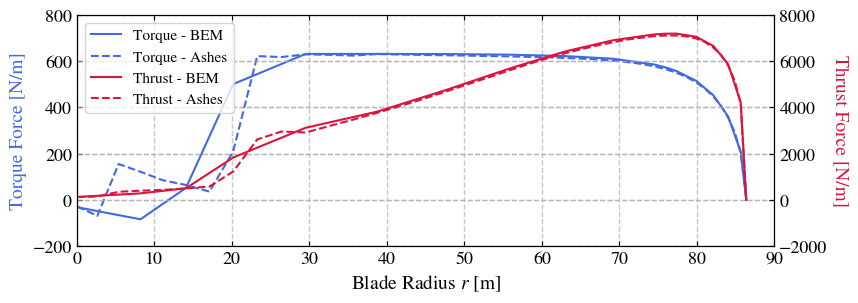

[ 0.       2.64302  5.37977  8.20274 11.1031  14.071   17.0953  20.1641
 23.2647  26.3837  29.5076  32.6228  35.7156  38.773   41.7824  44.732
 47.6111  50.4099  53.1201  55.7344  58.247   60.6534  62.9501  65.1352
 67.2076  69.1675  71.0159  72.7545  74.386   75.9133  77.3402  78.6705
 79.9085  81.0585  82.1252  83.113   84.0265  84.8703  85.6487  86.366  ]
0      2.800000
1     11.002738
2     16.871021
3     22.964122
4     32.307638
5     41.573020
6     50.411062
7     58.534435
8     65.750095
9     71.967492
10    77.185974
11    78.713347
12    80.140217
13    82.708485
14    84.925156
15    86.826486
16    88.448663
17    89.166000
Name: r, dtype: float64


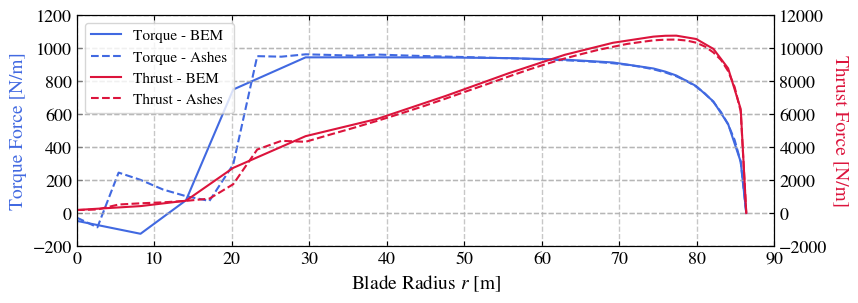

[ 0.       2.64302  5.37977  8.20274 11.1031  14.071   17.0953  20.1641
 23.2647  26.3837  29.5076  32.6228  35.7156  38.773   41.7824  44.732
 47.6111  50.4099  53.1201  55.7344  58.247   60.6534  62.9501  65.1352
 67.2076  69.1675  71.0159  72.7545  74.386   75.9133  77.3402  78.6705
 79.9085  81.0585  82.1252  83.113   84.0265  84.8703  85.6487  86.366  ]
0      2.800000
1     11.002738
2     16.871021
3     22.964122
4     32.307638
5     41.573020
6     50.411062
7     58.534435
8     65.750095
9     71.967492
10    77.185974
11    78.713347
12    80.140217
13    82.708485
14    84.925156
15    86.826486
16    88.448663
17    89.166000
Name: r, dtype: float64


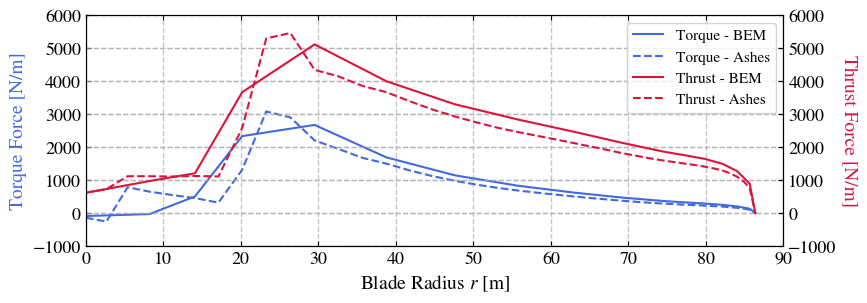

In [50]:
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams.update({'figure.autolayout': False})


for i in range(len(V_list)):
    output = steady_bem(R, V_list[i], omega_max_list[i], theta_list[i], lamda_list[i], df)
    P_t_arr = output['p_t_arr']
    P_n_arr = output['p_n_arr']

    # df_Ashes = pd.read_csv(data_txt[i],sep='\t',names=['r', 'Pt','Pn'])
    ashes = np.loadtxt(data_txt[i])
    r_Ashes = ashes[0]
    print(r_Ashes)
    print(r)
    Torque = ashes[1]
    Thrust = ashes[2]
    # print('ASHES: The torque values are {}'.format(Torque))
    # print('ASHES: The thrust values are {}'.format(Thrust))

    ###########################################
    fig, ax1 = plt.subplots(figsize = (9, 3))
    ax2 = ax1.twinx()

    #plotting of Pt values
    ax1.plot(r-2.8, P_t_arr, color='royalblue', label='Torque - BEM')
    ax1.plot(r_Ashes, Torque, color='royalblue', label='Torque - Ashes', linestyle='--')   

    #plotting of Pn values 
    ax2.plot(r-2.8, P_n_arr, color='crimson', label='Thrust - BEM')
    ax2.plot(r_Ashes, Thrust, color='crimson', label='Thrust - Ashes', linestyle='--')  

    # Plot the first dataset on the left y-axis
    ax1.set_xlabel('Blade Radius $r$ [m]', size=14)
    ax1.set_ylabel('Torque Force [N/m]', color='royalblue', size=14)
    ax2.set_ylabel('Thrust Force [N/m]', color='crimson', labelpad=15, rotation=270, size=14)

    # Ticks
    ax1.tick_params(axis='y', labelsize=13)  # Adjust the font size (e.g., 14)
    ax2.tick_params(axis='y', labelsize=13)  # Adjust the font size (e.g., 14)
    ax1.tick_params(axis='x', labelsize=13)  # Adjust the font size (e.g., 14)
    ax1.tick_params(axis='both', bottom=True, top=True, left=True, direction='in', which='major')
    ax2.tick_params(axis='both', right=True, direction='in', which='major')


    alignYaxes([ax1, ax2], [0, 0])
    ax1.grid(linestyle='--', linewidth=1, alpha=0.7)
    ax2.grid(linestyle='--', linewidth=1, alpha=0.7)

    # Create a single legend for both subplots
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best', fontsize=11)

    plt.xlim([0, 90])
    plt.savefig(f'plots/Q5_V_{title[i]}.pdf', bbox_inches = 'tight')
    plt.show()